# House Price Prediction (Regression)  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns', None)

data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
data = data.drop(['Id','Alley','FireplaceQu', 'PoolQC', 'Fence','MiscFeature' ], axis=1)

# Handling Missing Values

## Numeric Features

In [6]:
missNum = [f for f in data if data[f].isnull().sum()>0 and data[f].dtype!='O']

In [7]:
missNum_mean = data[missNum].mean()

In [8]:
missNum_mean

LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [9]:
data[missNum] = data[missNum].fillna(missNum_mean)

In [10]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


## Categorical Features

In [11]:
missCat = [f for f in data if data[f].isnull().sum()>0 and data[f].dtype == 'O' ]

In [12]:
missCat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [13]:
missCat_mode = data[missCat].mode().sum()

In [14]:
missCat_mode

MasVnrType        None
BsmtQual            TA
BsmtCond            TA
BsmtExposure        No
BsmtFinType1       Unf
BsmtFinType2       Unf
Electrical       SBrkr
GarageType      Attchd
GarageFinish       Unf
GarageQual          TA
GarageCond          TA
dtype: object

In [15]:
data[missCat] = data[missCat].fillna(missCat_mode)

In [16]:
data[missCat].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

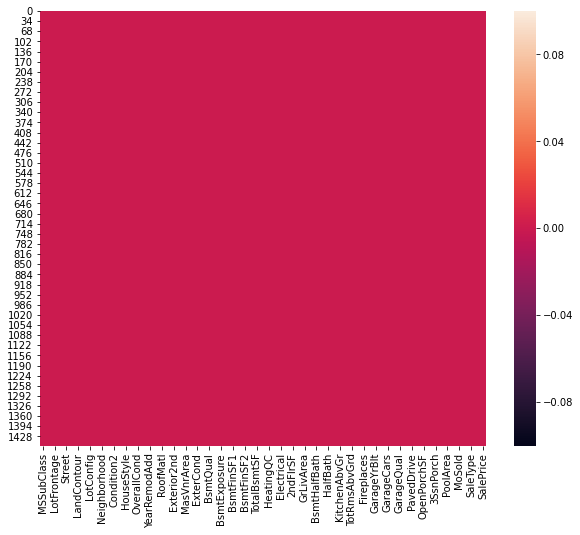

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())

In [18]:
numerical_r = [f for f in data if data[f].dtype !='O']

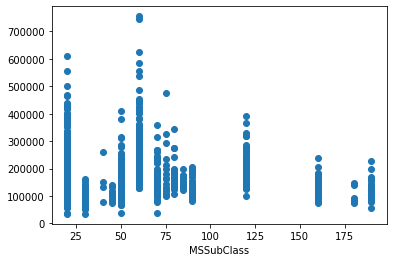

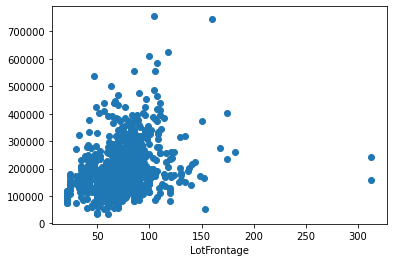

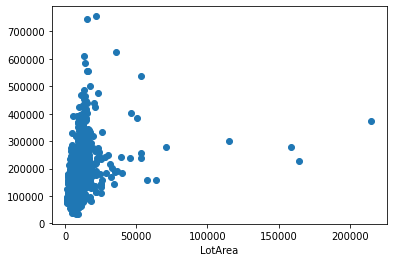

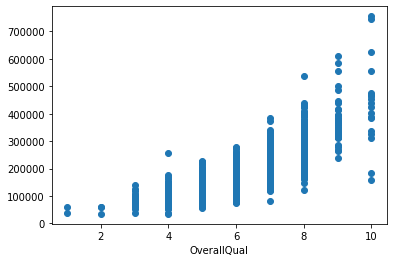

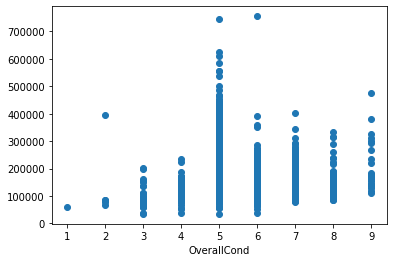

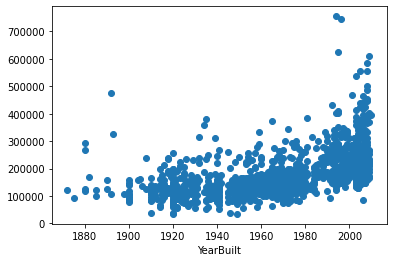

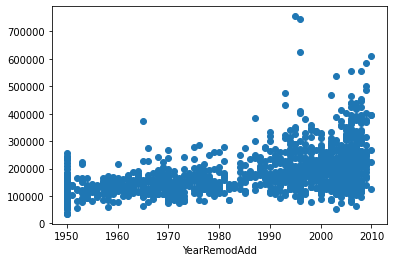

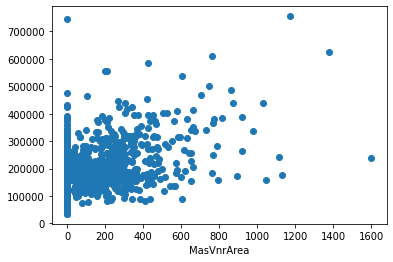

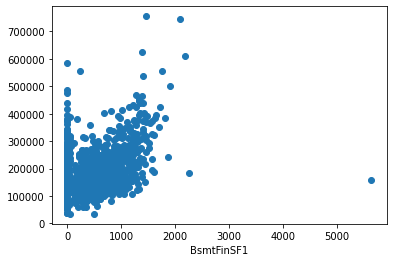

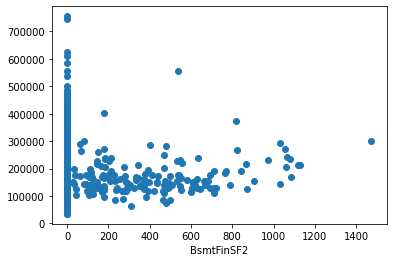

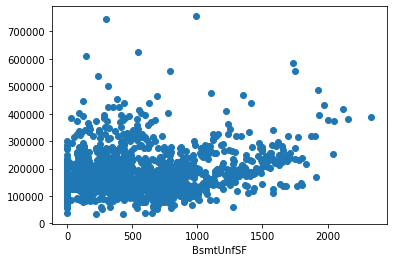

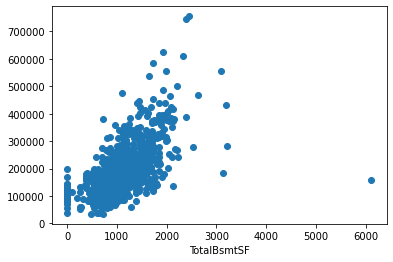

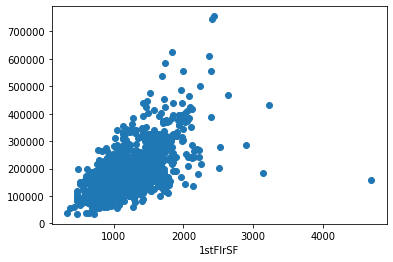

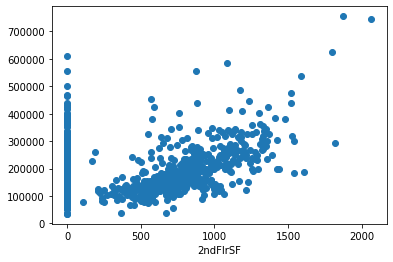

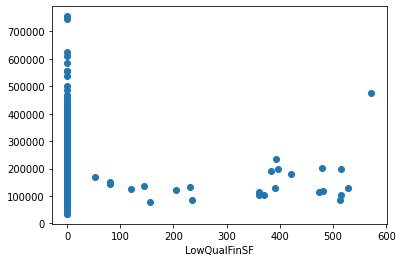

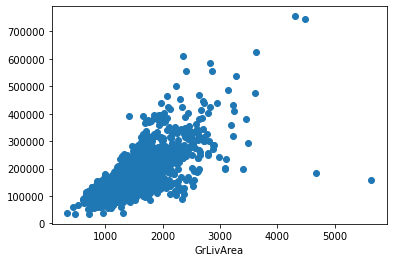

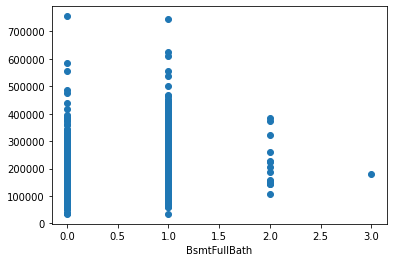

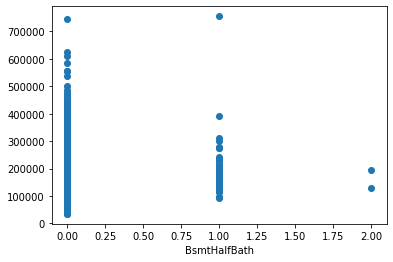

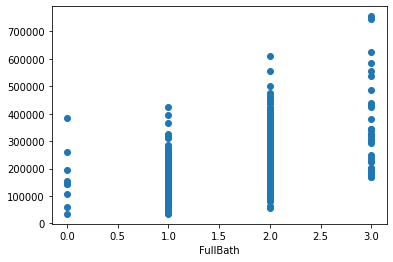

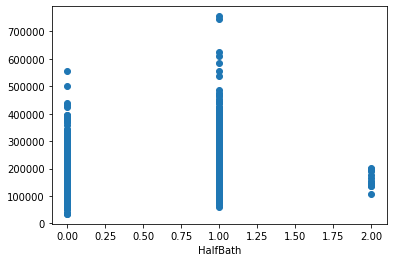

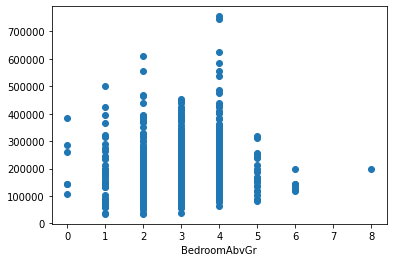

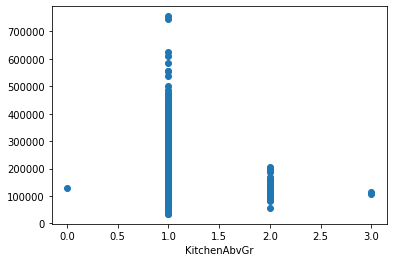

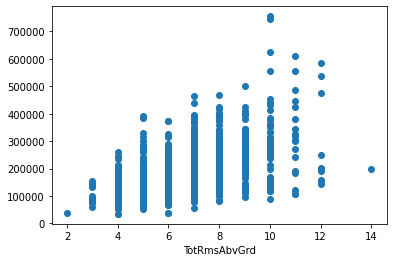

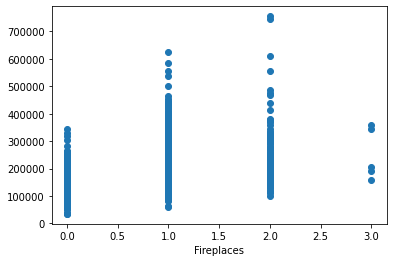

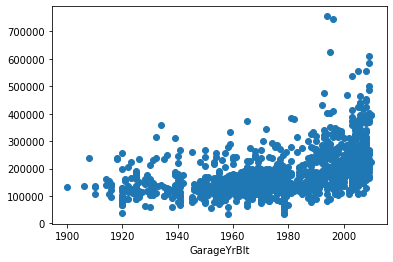

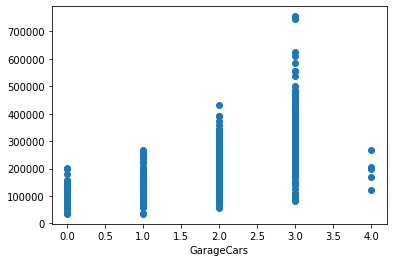

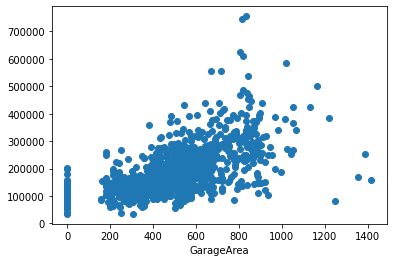

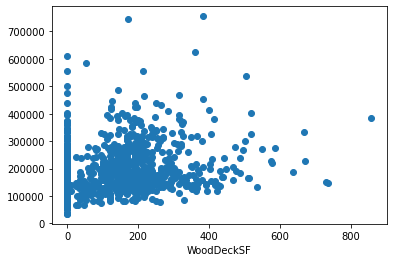

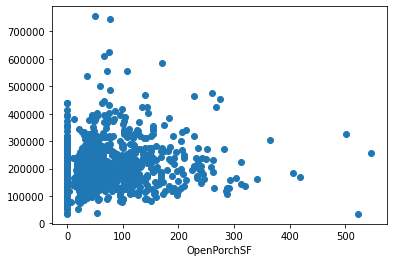

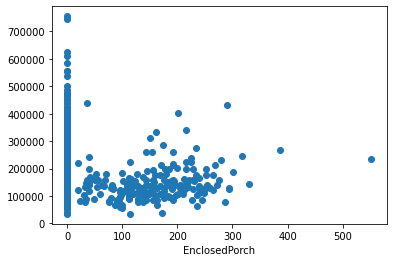

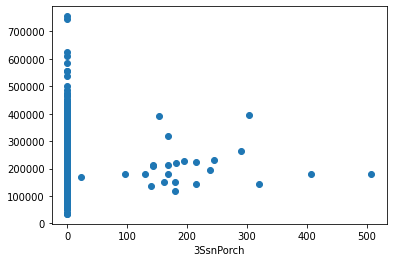

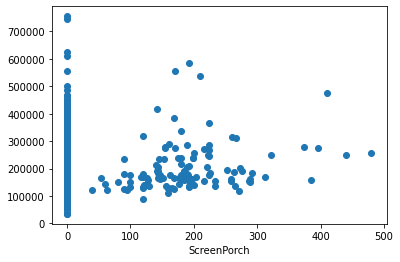

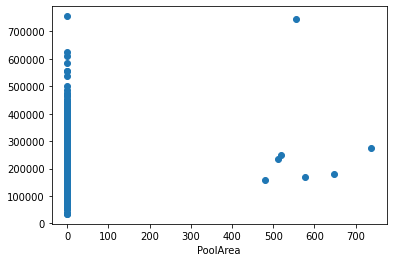

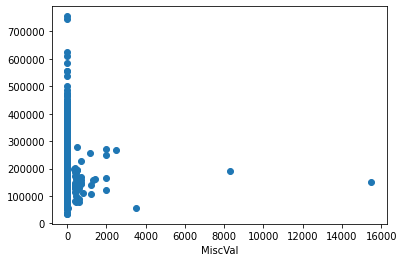

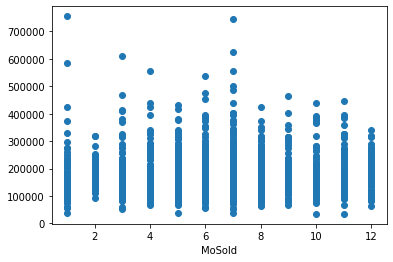

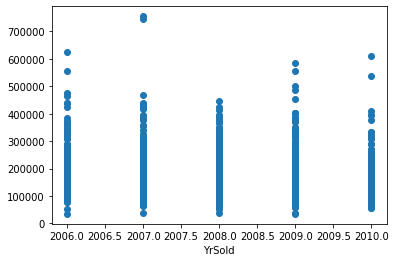

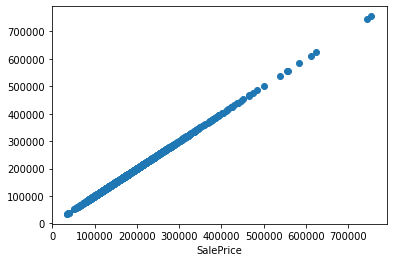

In [19]:
for f in numerical_r:
    dataNr = data.copy()
    plt.scatter(dataNr[f], data['SalePrice'])
    plt.xlabel(f)
    plt.show()
    

In [20]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Feature Engineering

## Categorical Features

In [21]:
categorical =[f for f in data if data[f].dtype == 'O']

In [22]:
data[categorical].shape

(1460, 38)

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


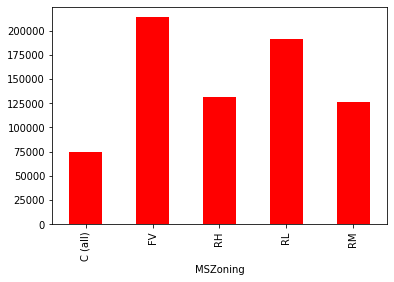

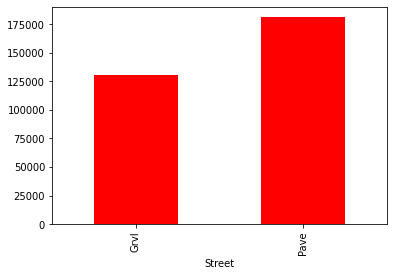

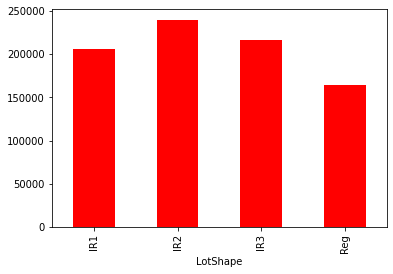

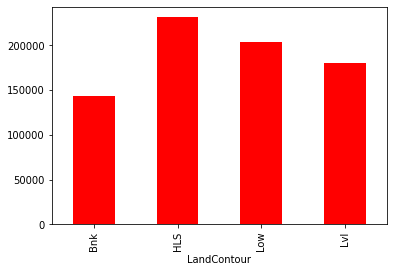

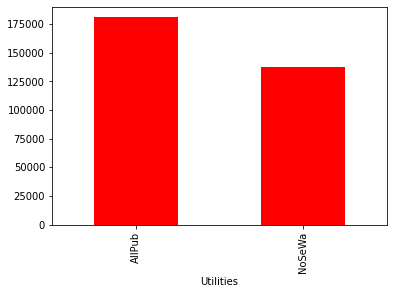

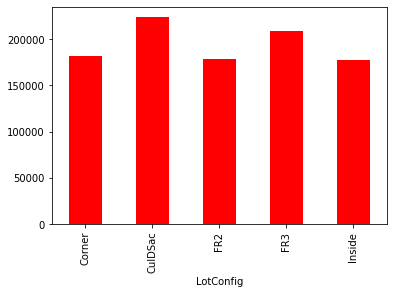

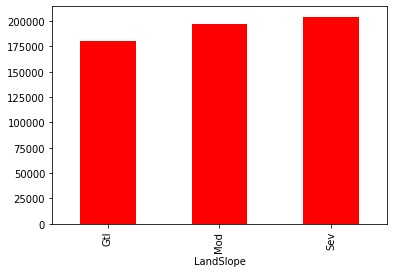

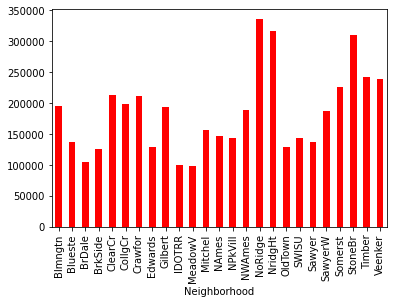

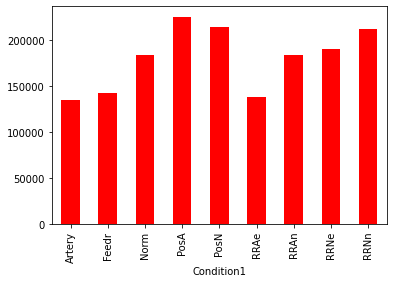

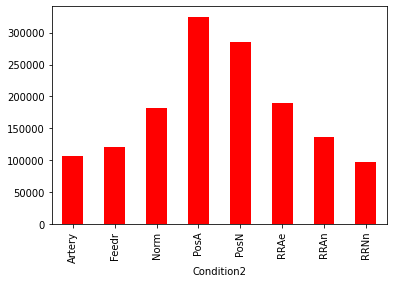

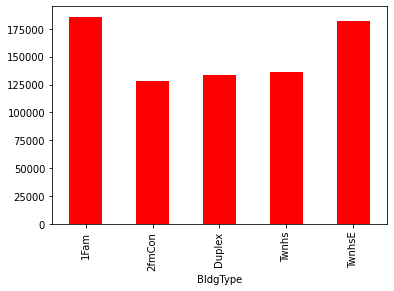

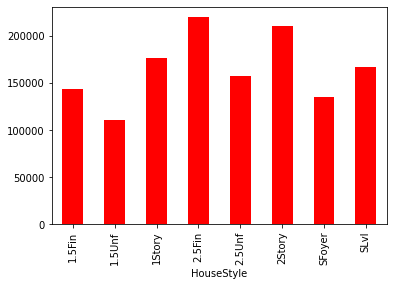

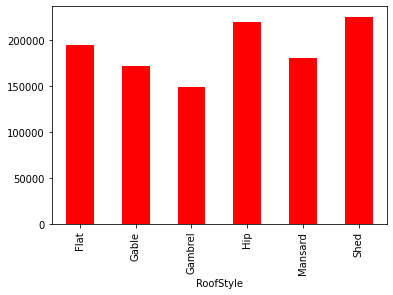

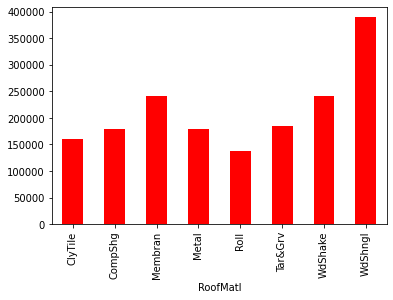

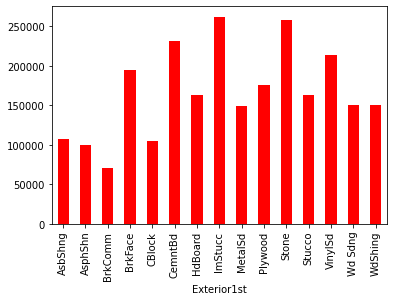

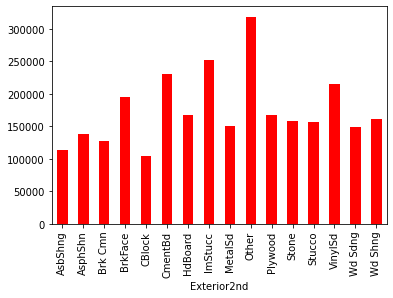

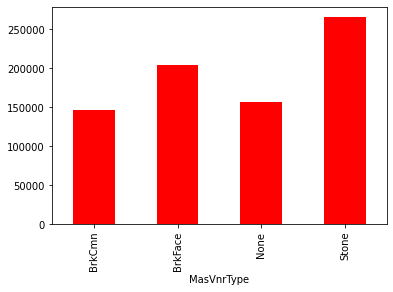

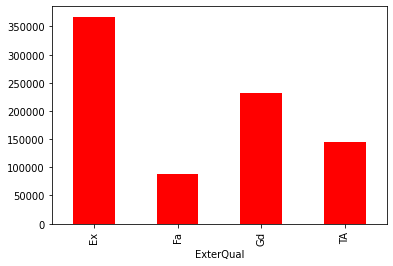

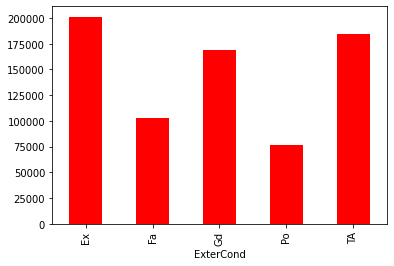

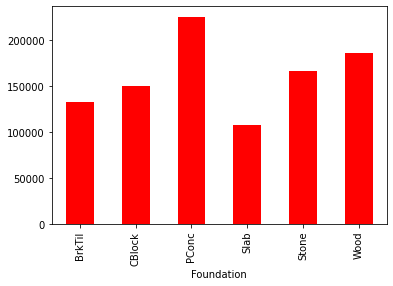

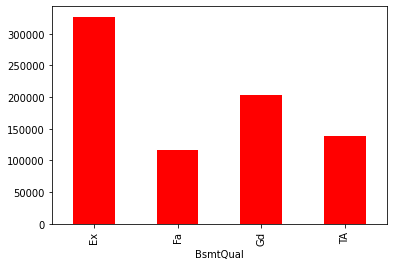

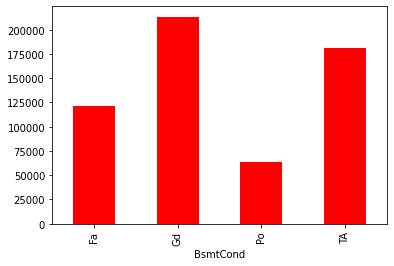

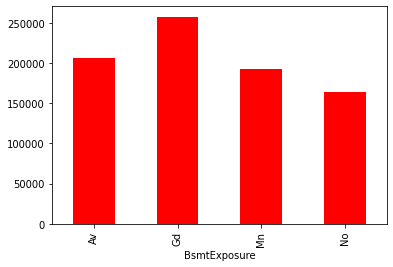

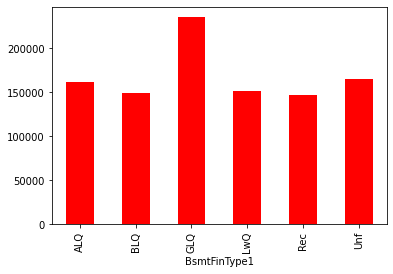

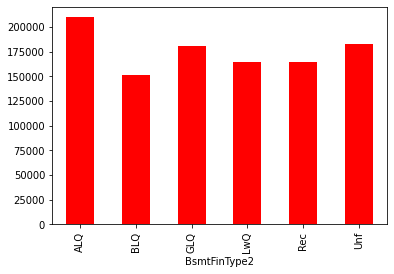

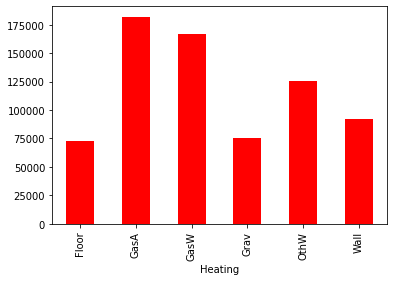

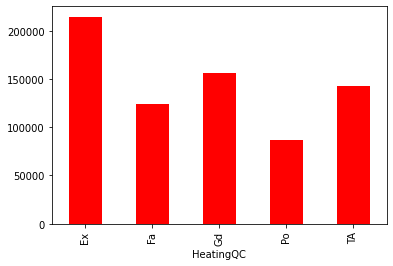

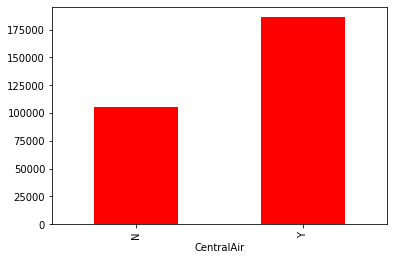

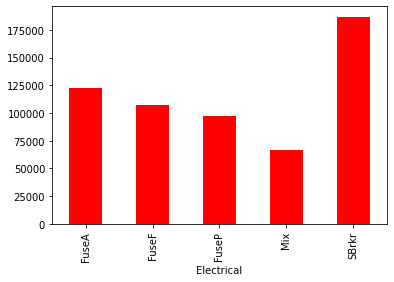

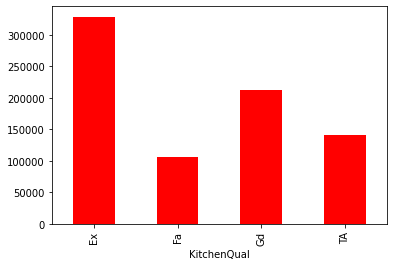

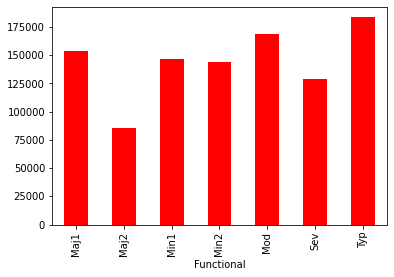

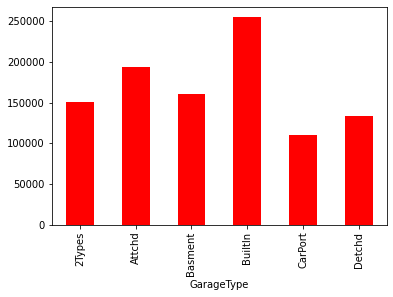

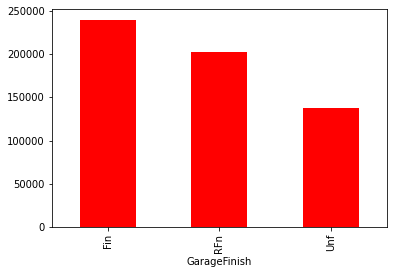

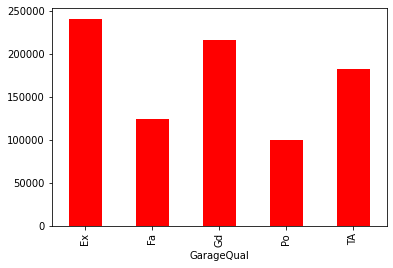

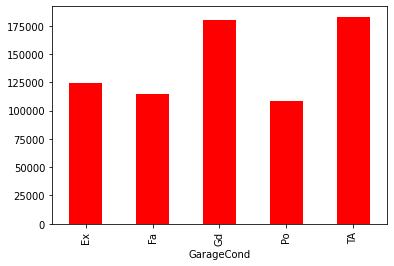

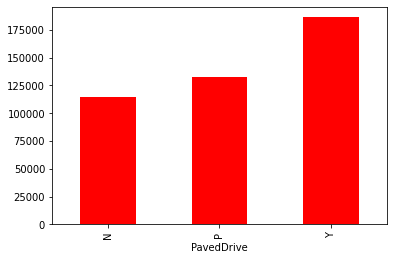

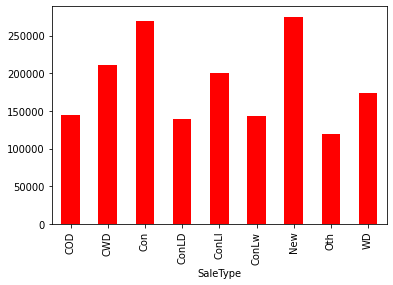

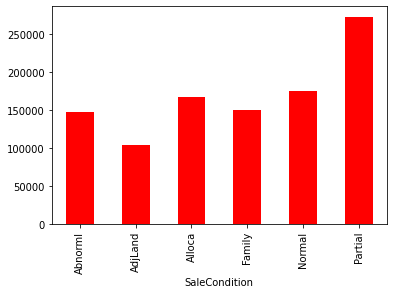

In [23]:
for f in categorical:
    dataCat = data.copy()
    dataCat.groupby(f)['SalePrice'].mean().plot.bar(colors='red')
    plt.show()

## Numerical Features

In [24]:
sale_price = data['SalePrice']

In [25]:
data = data.drop(['SalePrice'], axis=1)

In [26]:
numerical = [f for f in data if data[f].dtype !='O']

In [27]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Separating Year Features

In [28]:
year = [f for f in numerical if 'Year' in f or 'Yr' in f]
data[year].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [29]:
data = data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1)

In [30]:
numerical = [f for f in data if data[f].dtype !='O']

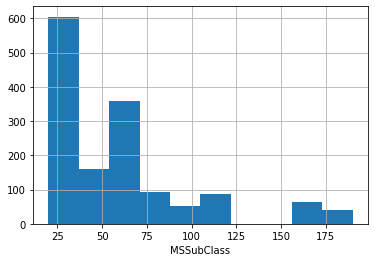

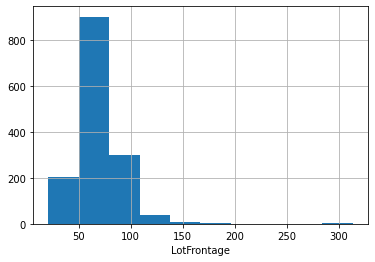

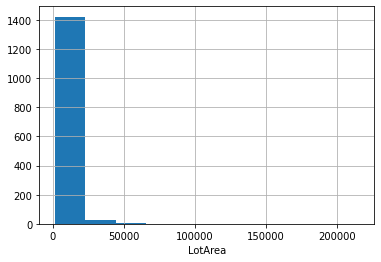

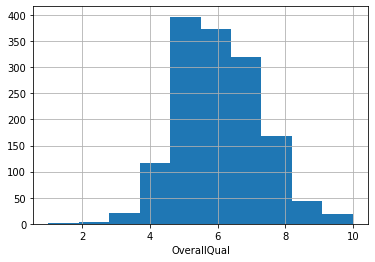

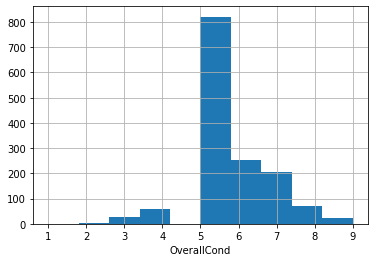

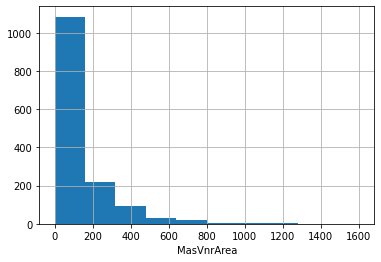

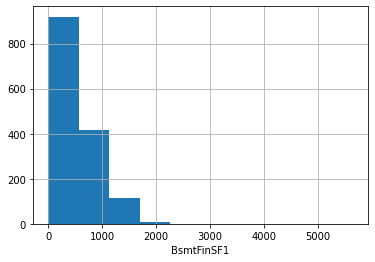

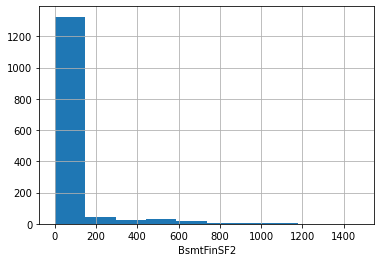

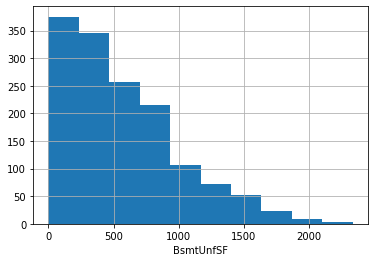

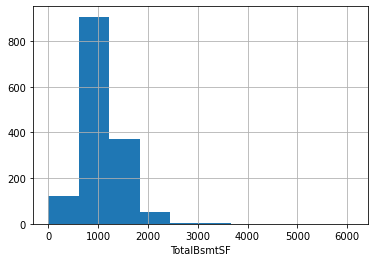

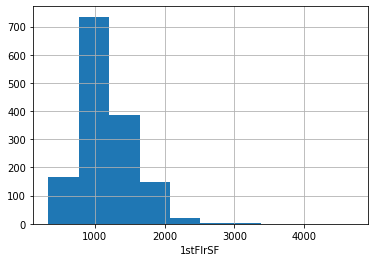

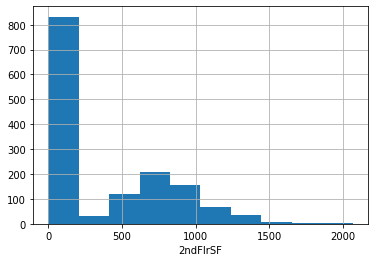

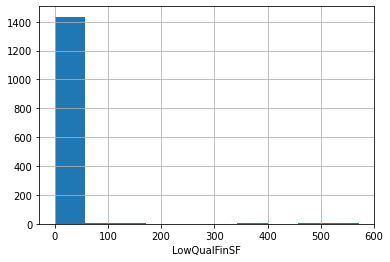

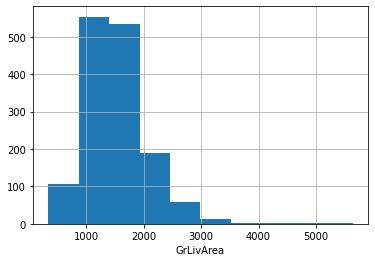

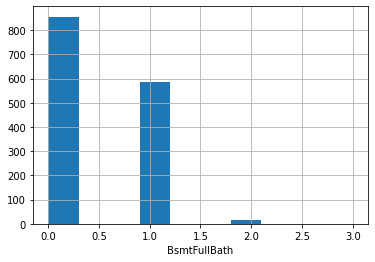

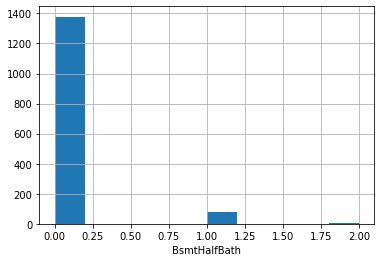

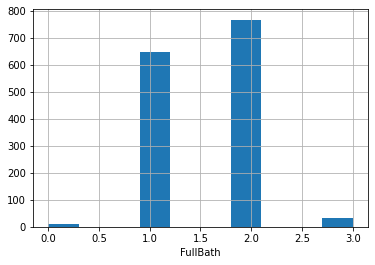

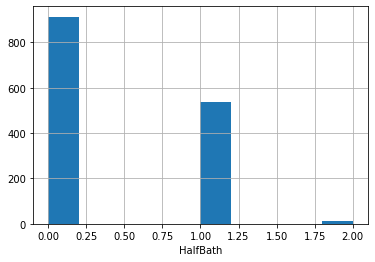

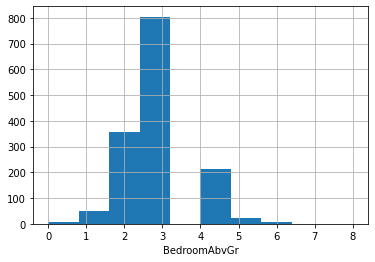

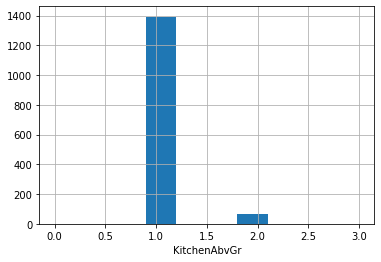

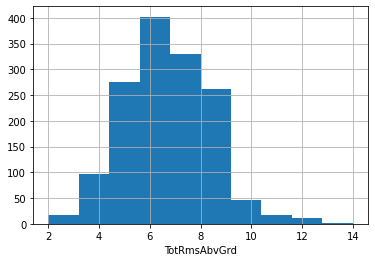

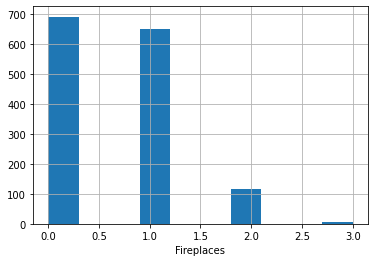

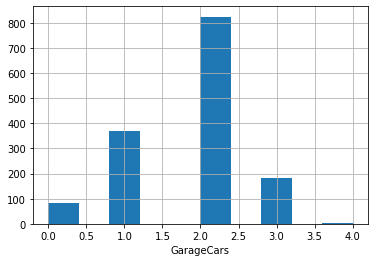

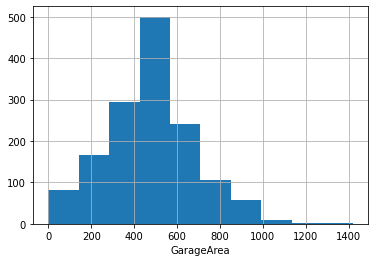

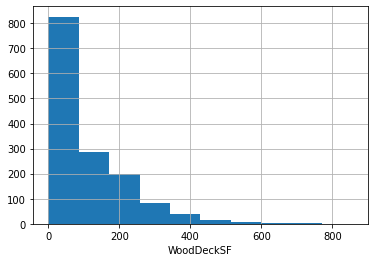

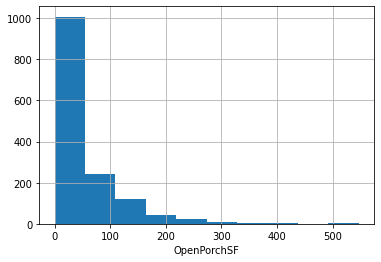

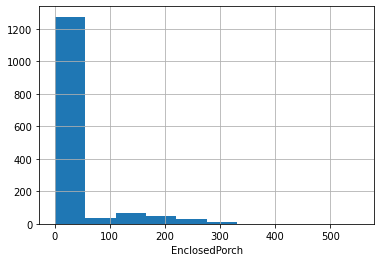

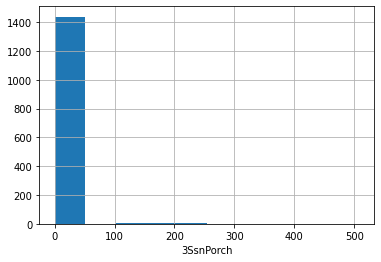

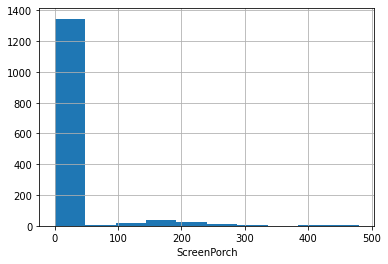

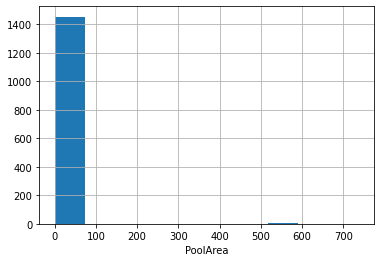

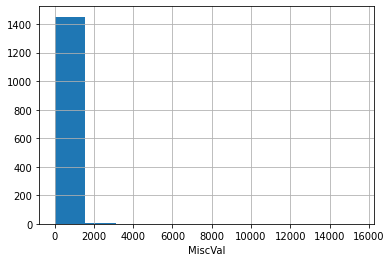

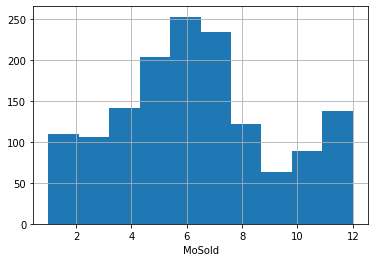

In [31]:
for f in numerical:
    dataC = data.copy()
    data[f].hist()
    plt.xlabel(f)
    plt.show()

In [32]:
dataT = np.log(data[numerical]+1)

In [33]:
dataT.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,4.217092,9.110966,1.940309,1.869266,2.145749,4.229731,0.655398,5.648378,6.750560,7.008452,2.864586,0.099814,7.268512,0.291395,0.039486,0.917827,0.263025,1.327943,0.711673,1.994407,0.399875,0.972599,5.808156,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,1.910828
std,0.688354,0.314733,0.517369,0.201983,0.168400,2.630626,2.992052,1.845045,1.854020,1.145712,0.317431,3.293311,0.747354,0.333303,0.349839,0.162599,0.223281,0.341869,0.229907,0.089268,0.214246,0.394660,0.322269,1.455118,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,0.425540
min,3.044522,3.091042,7.170888,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,3.044522,4.110874,8.929898,1.791759,1.791759,0.000000,0.000000,0.000000,5.411646,6.680541,6.783325,0.000000,0.000000,7.030415,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,0.693147,5.815592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759
50%,3.931826,4.263383,9.156887,1.945910,1.791759,0.000000,5.951943,0.000000,6.170651,6.900227,6.992096,0.000000,0.000000,7.289611,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,1.098612,6.175867,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910
75%,4.262680,4.382027,9.358976,2.079442,1.945910,5.107456,6.569832,0.000000,6.695799,7.169542,7.238676,6.591674,0.000000,7.483104,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,1.098612,6.357842,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225
max,5.252273,5.749393,12.279537,2.397895,2.302585,7.378384,8.638525,7.296413,7.756623,8.717846,8.453827,7.633370,6.350886,8.638171,1.386294,1.098612,1.386294,1.098612,2.197225,1.386294,2.708050,1.386294,1.609438,7.257708,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,2.564949


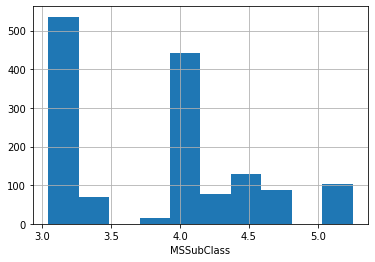

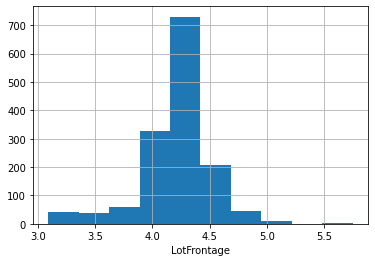

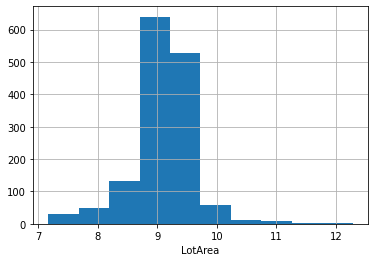

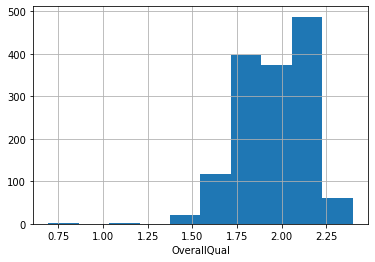

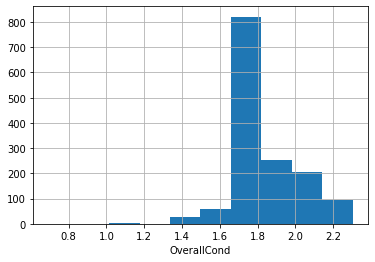

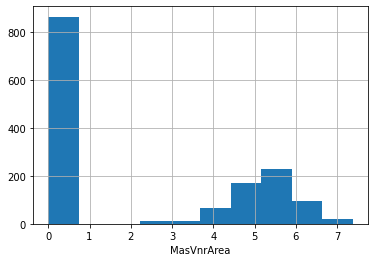

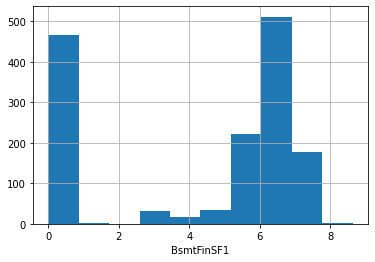

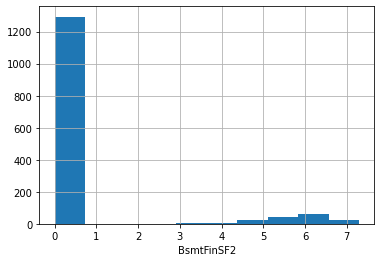

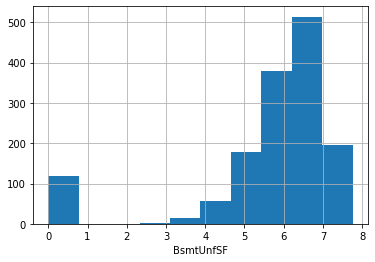

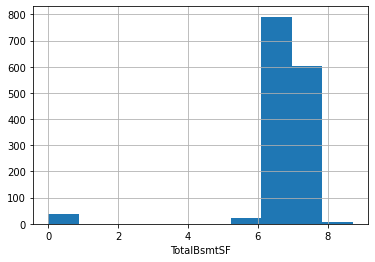

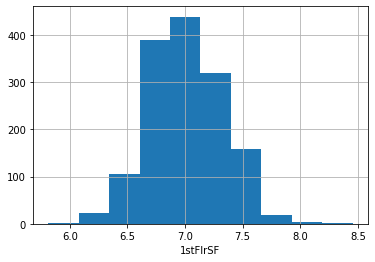

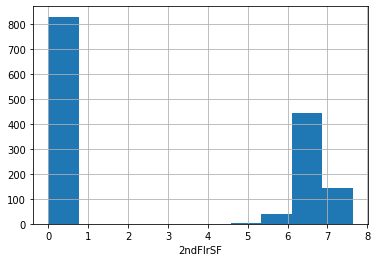

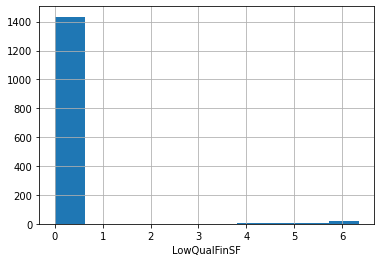

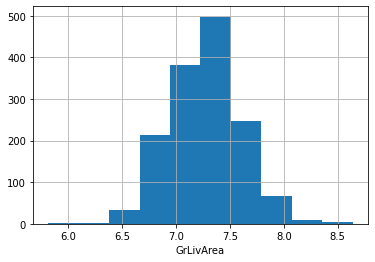

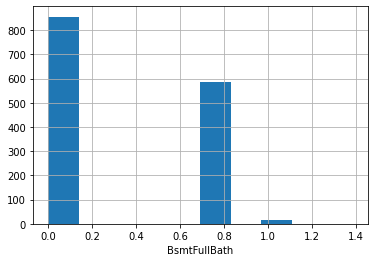

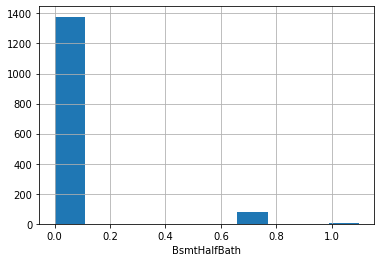

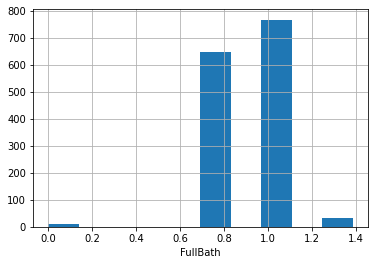

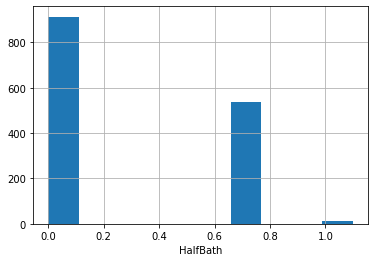

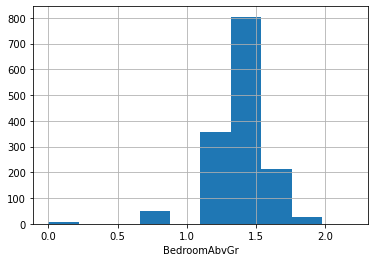

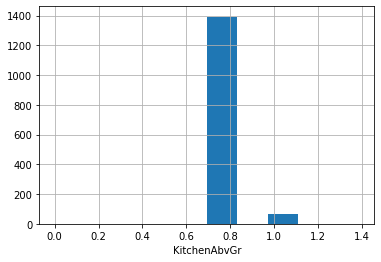

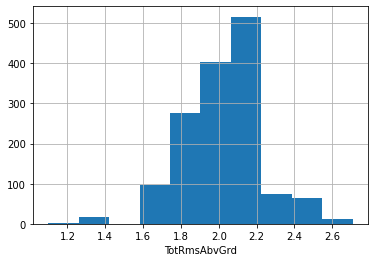

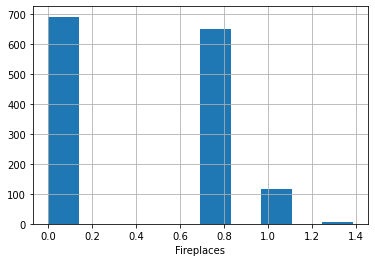

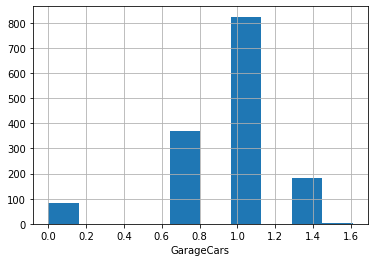

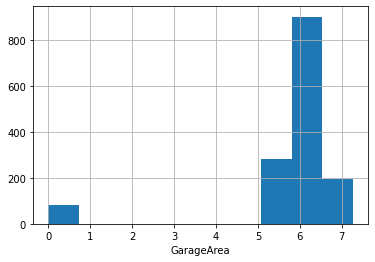

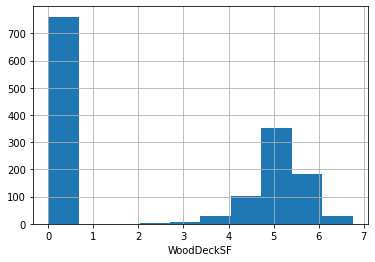

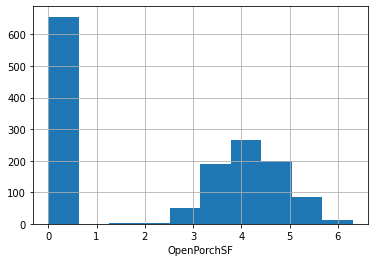

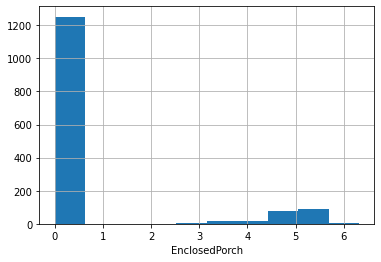

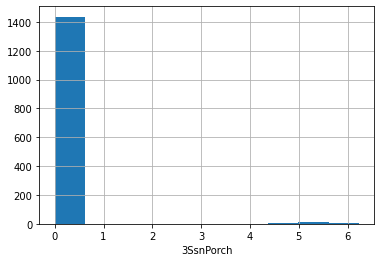

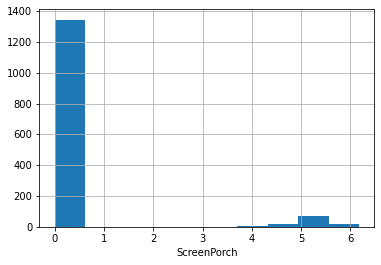

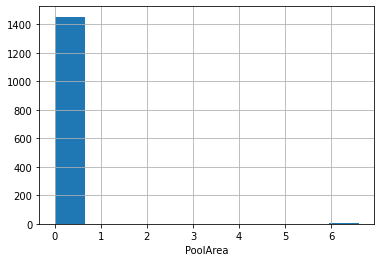

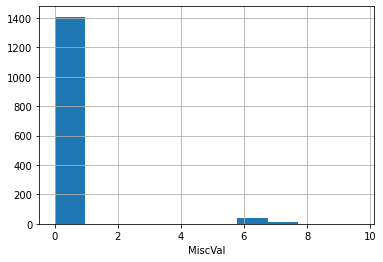

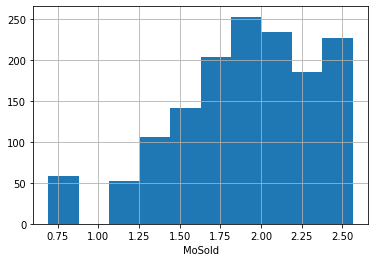

In [34]:
for f in numerical:
    dataC = dataT.copy()
    dataC[f].hist()
    plt.xlabel(f)
    plt.show()

## Detecting and Removing Outliers

In [35]:
maxTh = dataT.quantile(0.95)

In [36]:
maxTh[1:32]

LotFrontage      4.653960
LotArea          9.764349
OverallQual      2.197225
OverallCond      2.197225
MasVnrArea       6.124683
BsmtFinSF1       7.150701
BsmtFinSF2       5.984438
BsmtUnfSF        7.292337
TotalBsmtSF      7.469654
1stFlrSF         7.513300
2ndFlrSF         7.040580
LowQualFinSF     0.000000
GrLivArea        7.810799
BsmtFullBath     0.693147
BsmtHalfBath     0.693147
FullBath         1.098612
HalfBath         0.693147
BedroomAbvGr     1.609438
KitchenAbvGr     0.693147
TotRmsAbvGrd     2.397895
Fireplaces       1.098612
GarageCars       1.386294
GarageArea       6.746529
WoodDeckSF       5.817111
OpenPorchSF      5.170767
EnclosedPorch    5.199319
3SsnPorch        0.000000
ScreenPorch      5.081404
PoolArea         0.000000
MiscVal          0.000000
MoSold           2.484907
Name: 0.95, dtype: float64

In [37]:
minTh = dataT.quantile(0.05)

In [38]:
minTh[1:32]

LotFrontage      3.609548
LotArea          8.105503
OverallQual      1.609438
OverallCond      1.609438
MasVnrArea       0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      6.254388
1stFlrSF         6.513156
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        6.744059
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.693147
HalfBath         0.000000
BedroomAbvGr     1.098612
KitchenAbvGr     0.693147
TotRmsAbvGrd     1.609438
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           1.098612
Name: 0.05, dtype: float64

In [39]:
df2  = dataT[(dataT<maxTh) & (dataT>minTh)]

In [40]:
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,5.283204,6.561031,NaN,5.017280,6.753438,6.753438,6.751101,NaN,7.444833,NaN,NaN,NaN,NaN,1.386294,NaN,2.197225,NaN,1.098612,6.308098,NaN,4.127134,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4.394449,9.169623,1.945910,NaN,NaN,6.886532,NaN,5.652489,7.141245,7.141245,NaN,NaN,7.141245,NaN,NaN,NaN,NaN,1.386294,NaN,1.945910,0.693147,1.098612,6.133398,5.700444,NaN,NaN,NaN,NaN,NaN,NaN,1.791759
2,4.110874,4.234107,9.328212,2.079442,1.791759,5.093750,6.188264,NaN,6.075346,6.825460,6.825460,6.765039,NaN,7.488294,NaN,NaN,NaN,NaN,1.386294,NaN,1.945910,0.693147,1.098612,6.411818,NaN,3.761200,NaN,NaN,NaN,NaN,NaN,2.302585
3,4.262680,4.110874,9.164401,2.079442,1.791759,NaN,5.379897,NaN,6.293419,6.629363,6.869014,6.629363,NaN,7.448916,NaN,NaN,NaN,NaN,1.386294,NaN,2.079442,0.693147,NaN,6.466145,NaN,3.583519,NaN,NaN,NaN,NaN,NaN,NaN
4,4.110874,4.442651,9.565284,NaN,1.791759,5.860786,6.486161,NaN,6.196444,7.044033,7.044033,6.960348,NaN,7.695758,NaN,NaN,NaN,NaN,NaN,NaN,2.302585,0.693147,NaN,6.729824,5.262690,4.442651,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,1.945910,1.791759,NaN,NaN,NaN,6.860664,6.860664,6.860664,6.543912,NaN,7.407318,NaN,NaN,NaN,NaN,1.386294,NaN,2.079442,0.693147,1.098612,6.133398,NaN,3.713572,NaN,NaN,NaN,NaN,NaN,2.197225
1456,NaN,4.454347,9.486152,1.945910,1.945910,4.787492,6.673298,5.099866,6.380123,7.341484,NaN,NaN,NaN,7.637234,NaN,NaN,NaN,NaN,1.386294,NaN,2.079442,NaN,1.098612,6.216606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,4.262680,4.204693,9.109746,2.079442,NaN,NaN,5.620401,NaN,6.777647,7.050123,7.080868,NaN,NaN,7.758333,NaN,NaN,NaN,NaN,NaN,NaN,2.302585,NaN,0.693147,5.533389,NaN,4.110874,NaN,NaN,NaN,NaN,NaN,1.791759
1458,NaN,4.234107,9.181735,1.791759,1.945910,NaN,3.912023,NaN,NaN,6.983790,6.983790,NaN,NaN,6.983790,NaN,NaN,NaN,NaN,NaN,NaN,1.791759,NaN,0.693147,5.484797,NaN,NaN,4.727388,NaN,NaN,NaN,NaN,1.609438


In [41]:
df2.isnull().sum()

MSSubClass        639
LotFrontage       148
LotArea           146
OverallQual       370
OverallCond       182
MasVnrArea        935
BsmtFinSF1        541
BsmtFinSF2       1366
BsmtUnfSF         192
TotalBsmtSF       147
1stFlrSF          146
2ndFlrSF          902
LowQualFinSF     1460
GrLivArea         151
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr      656
KitchenAbvGr     1460
TotRmsAbvGrd      192
Fireplaces        810
GarageCars        267
GarageArea        154
WoodDeckSF        835
OpenPorchSF       729
EnclosedPorch    1325
3SsnPorch        1460
ScreenPorch      1419
PoolArea         1460
MiscVal          1460
MoSold            248
dtype: int64

In [42]:
df3 = df2.drop(['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces',
               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
               'MiscVal'], axis=1)

In [43]:
df3.isnull().sum()

MSSubClass      639
LotFrontage     148
LotArea         146
OverallQual     370
OverallCond     182
MasVnrArea      935
BsmtFinSF1      541
BsmtUnfSF       192
TotalBsmtSF     147
1stFlrSF        146
GrLivArea       151
BedroomAbvGr    656
TotRmsAbvGrd    192
GarageCars      267
GarageArea      154
MoSold          248
dtype: int64

In [44]:
df3 = df3.drop(['MasVnrArea', 'BedroomAbvGr'], axis=1)

In [45]:
numMissN = [f for f in df3 if df3[f].isnull().sum()>1]

In [46]:
numMissN = df3[numMissN].mean()

In [47]:
numMissN

MSSubClass      4.158213
LotFrontage     4.232513
LotArea         9.124290
OverallQual     1.928845
OverallCond     1.868302
BsmtFinSF1      6.131892
BsmtUnfSF       6.070558
TotalBsmtSF     6.913375
1stFlrSF        7.008325
GrLivArea       7.268866
TotRmsAbvGrd    2.005285
GarageCars      0.973200
GarageArea      6.110386
MoSold          1.934685
dtype: float64

In [48]:
df4 = df3.fillna(numMissN)

In [49]:
df4.isnull().sum()
df4

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,MoSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685
1,4.158213,4.394449,9.169623,1.945910,1.868302,6.886532,5.652489,7.141245,7.141245,7.141245,1.945910,1.098612,6.133398,1.791759
2,4.110874,4.234107,9.328212,2.079442,1.791759,6.188264,6.075346,6.825460,6.825460,7.488294,1.945910,1.098612,6.411818,2.302585
3,4.262680,4.110874,9.164401,2.079442,1.791759,5.379897,6.293419,6.629363,6.869014,7.448916,2.079442,0.973200,6.466145,1.934685
4,4.110874,4.442651,9.565284,1.928845,1.791759,6.486161,6.196444,7.044033,7.044033,7.695758,2.302585,0.973200,6.729824,1.934685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,1.945910,1.791759,6.131892,6.860664,6.860664,6.860664,7.407318,2.079442,1.098612,6.133398,2.197225
1456,4.158213,4.454347,9.486152,1.945910,1.945910,6.673298,6.380123,7.341484,7.008325,7.637234,2.079442,1.098612,6.216606,1.934685
1457,4.262680,4.204693,9.109746,2.079442,1.868302,5.620401,6.777647,7.050123,7.080868,7.758333,2.302585,0.693147,5.533389,1.791759
1458,4.158213,4.234107,9.181735,1.791759,1.945910,3.912023,6.070558,6.983790,6.983790,6.983790,1.791759,0.693147,5.484797,1.609438


# Distribution of Numerical Features After removing Outliers

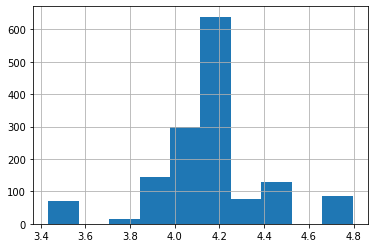

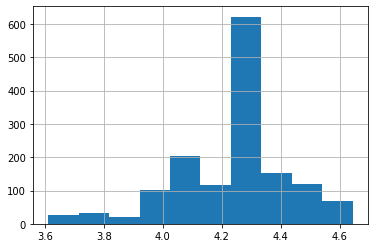

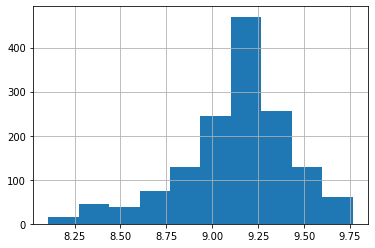

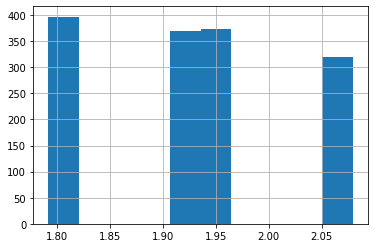

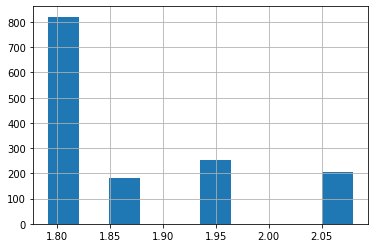

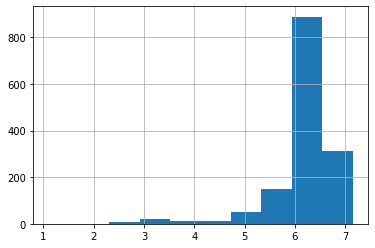

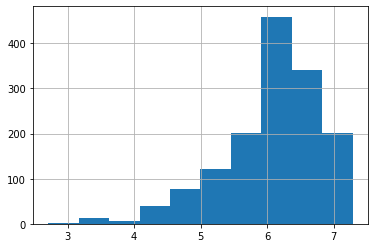

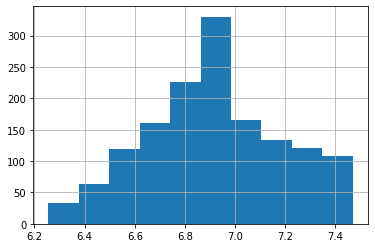

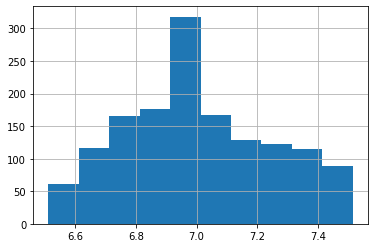

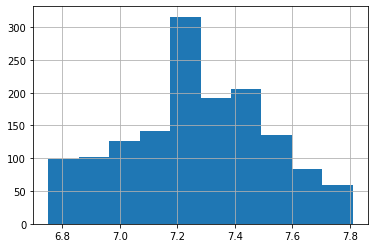

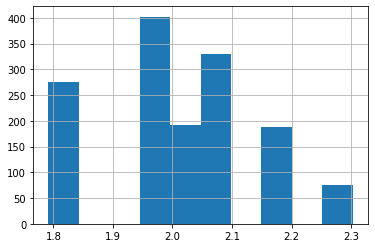

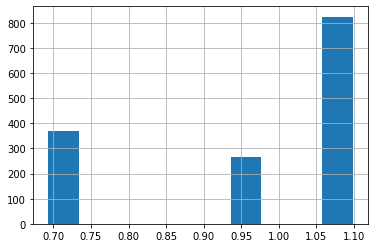

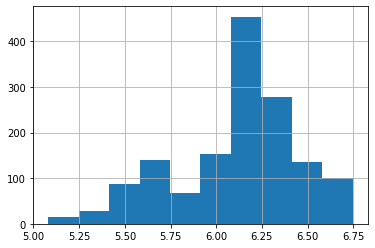

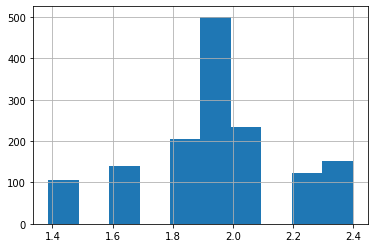

In [50]:
for f in df4:
    dataL = df4.copy()
    dataL[f].hist()
    plt.show()

# Concatinate Categorical and Numerical Features

In [51]:
df_cat = data[categorical]

In [52]:
df6 = pd.concat([df_cat, df4], axis=1)

In [53]:
df6.shape

(1460, 52)

In [54]:
df6

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,MoSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,4.158213,4.394449,9.169623,1.945910,1.868302,6.886532,5.652489,7.141245,7.141245,7.141245,1.945910,1.098612,6.133398,1.791759
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,4.110874,4.234107,9.328212,2.079442,1.791759,6.188264,6.075346,6.825460,6.825460,7.488294,1.945910,1.098612,6.411818,2.302585
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,4.262680,4.110874,9.164401,2.079442,1.791759,5.379897,6.293419,6.629363,6.869014,7.448916,2.079442,0.973200,6.466145,1.934685
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,4.110874,4.442651,9.565284,1.928845,1.791759,6.486161,6.196444,7.044033,7.044033,7.695758,2.302585,0.973200,6.729824,1.934685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,4.110874,4.143135,8.976894,1.945910,1.791759,6.131892,6.860664,6.860664,6.860664,7.407318,2.079442,1.098612,6.133398,2.197225
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,4.158213,4.454347,9.486152,1.945910,1.945910,6.673298,6.380123,7.341484,7.008325,7.637234,2.079442,1.098612,6.216606,1.934685
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,4.262680,4.204693,9.109746,2.079442,1.868302,5.620401,6.777647,7.050123,7.080868,7.758333,2.302585,0.693147,5.533389,1.791759
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,4.158213,4.234107,9.181735,1.791759,1.945910,3.912023,6.070558,6.983790,6.983790,6.983790,1.791759,0.693147,5.484797,1.609438


In [55]:
cat_features = [f for f in df6 if df6[f].dtype == 'O']
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Encoding Categorical Features

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
df7= df6[cat_features].apply(LabelEncoder().fit_transform)

In [58]:
df7

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,1,2,4,4,2,8,4


In [59]:
df8 = pd.concat([df7, df4], axis=1)

In [60]:
df8

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,MoSold
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,4.158213,4.394449,9.169623,1.945910,1.868302,6.886532,5.652489,7.141245,7.141245,7.141245,1.945910,1.098612,6.133398,1.791759
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.234107,9.328212,2.079442,1.791759,6.188264,6.075346,6.825460,6.825460,7.488294,1.945910,1.098612,6.411818,2.302585
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,4.262680,4.110874,9.164401,2.079442,1.791759,5.379897,6.293419,6.629363,6.869014,7.448916,2.079442,0.973200,6.466145,1.934685
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.442651,9.565284,1.928845,1.791759,6.486161,6.196444,7.044033,7.044033,7.695758,2.302585,0.973200,6.729824,1.934685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,1,1,4,4,2,8,4,4.110874,4.143135,8.976894,1.945910,1.791759,6.131892,6.860664,6.860664,6.860664,7.407318,2.079442,1.098612,6.133398,2.197225
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,1,2,4,4,2,8,4,4.158213,4.454347,9.486152,1.945910,1.945910,6.673298,6.380123,7.341484,7.008325,7.637234,2.079442,1.098612,6.216606,1.934685
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.262680,4.204693,9.109746,2.079442,1.868302,5.620401,6.777647,7.050123,7.080868,7.758333,2.302585,0.693147,5.533389,1.791759
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,1,2,4,4,2,8,4,4.158213,4.234107,9.181735,1.791759,1.945910,3.912023,6.070558,6.983790,6.983790,6.983790,1.791759,0.693147,5.484797,1.609438


# Bulid Model

### - Linear Regression
### - Random Forest Regressor 
### - Ridge Regressor
### - XGBoost

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

In [62]:
#independent features

X = df8

In [63]:
X

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,MoSold
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,4.158213,4.394449,9.169623,1.945910,1.868302,6.886532,5.652489,7.141245,7.141245,7.141245,1.945910,1.098612,6.133398,1.791759
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.234107,9.328212,2.079442,1.791759,6.188264,6.075346,6.825460,6.825460,7.488294,1.945910,1.098612,6.411818,2.302585
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,4.262680,4.110874,9.164401,2.079442,1.791759,5.379897,6.293419,6.629363,6.869014,7.448916,2.079442,0.973200,6.466145,1.934685
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.442651,9.565284,1.928845,1.791759,6.486161,6.196444,7.044033,7.044033,7.695758,2.302585,0.973200,6.729824,1.934685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,1,1,4,4,2,8,4,4.110874,4.143135,8.976894,1.945910,1.791759,6.131892,6.860664,6.860664,6.860664,7.407318,2.079442,1.098612,6.133398,2.197225
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,1,2,4,4,2,8,4,4.158213,4.454347,9.486152,1.945910,1.945910,6.673298,6.380123,7.341484,7.008325,7.637234,2.079442,1.098612,6.216606,1.934685
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.262680,4.204693,9.109746,2.079442,1.868302,5.620401,6.777647,7.050123,7.080868,7.758333,2.302585,0.693147,5.533389,1.791759
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,1,2,4,4,2,8,4,4.158213,4.234107,9.181735,1.791759,1.945910,3.912023,6.070558,6.983790,6.983790,6.983790,1.791759,0.693147,5.484797,1.609438


In [64]:
#dependent feature

y = sale_price

In [65]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

## Splittind into train and test data

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [68]:
xtrain.shape

(1022, 52)

In [69]:
ytrain.shape

(1022,)

# - Linear Regression

In [70]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print("Train Accuracy:",model1.score(xtrain, ytrain))
print("Test Accuracy:",model1.score(xtest, ytest))

Train Accuracy: 0.7354426673883385
Test Accuracy: 0.7522329808355643


In [72]:
model1.predict([[3, 1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685]])

array([209564.22431241])

# - Random Forest Regressor

In [73]:
model2 = RandomForestRegressor(n_estimators=250)

In [74]:
model2.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
print("Train Accuracy:",model2.score(xtrain, ytrain))
print("Test Accuracy:",model2.score(xtest, ytest))

Train Accuracy: 0.9674178817218814
Test Accuracy: 0.8301194230960494


In [76]:
model2.predict([[3, 1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685]])

array([210552.384])

# - Ridge Regression

In [77]:
model3 = Ridge(max_iter=100)
model3.fit(xtrain, ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [78]:
print("Train Accuracy:",model3.score(xtrain, ytrain))
print("Test Accuracy:",model3.score(xtest, ytest))

Train Accuracy: 0.7352755762363385
Test Accuracy: 0.7537830034673386


In [79]:
model3.predict([[3, 1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,4.110874,4.189655,9.042040,2.079442,1.791759,6.561031,5.017280,6.753438,6.753438,7.444833,2.197225,1.098612,6.308098,1.934685]])

array([209372.13532216])

# XGBoost Regressor

In [80]:
model4 =XGBRegressor(learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)

#tuning

In [81]:
model4.fit(xtrain, ytrain)

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:17:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4064, gamma=0,
             importance_type='gain', learning_rate=0.0139, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=None, n_estimators=4500,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=42,
             silent=None, subsample=0.7968, verbosity=1)

In [82]:
print("Train Accuracy:",model4.score(xtrain, ytrain))
print("Test Accuracy:",model4.score(xtest, ytest))

Train Accuracy: 0.9990963302105614
Test Accuracy: 0.8671049919490704


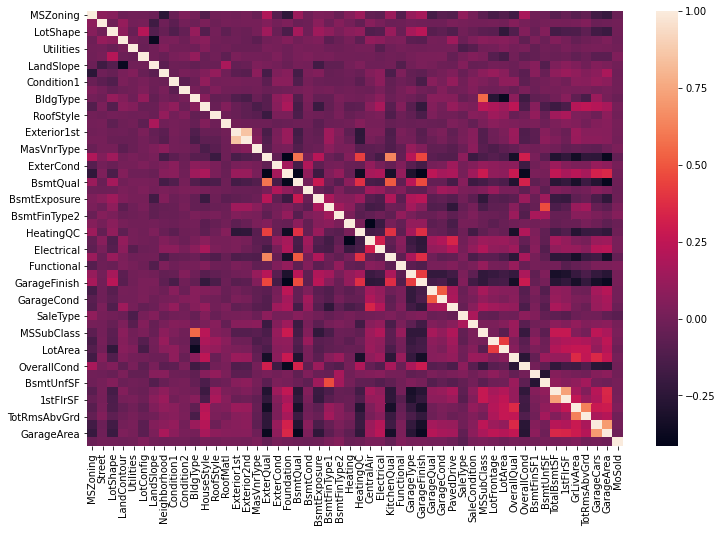

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(df8.corr())